<a href="https://colab.research.google.com/github/yeshg11/ML_project/blob/main/ML_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#usd to inr
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv("usd_inr.csv",index_col="Date")
data=data.iloc[:,:-2].copy()
data.index = pd.to_datetime(data.index)
print(data.head())

data['Close']=data.shift(-1)['Close']
data=data.iloc[:-1,:].copy()
#print(data.dtypes)
d= data.loc[:"03-11-2023"]
X_train=d.iloc[:,:-1].copy()
Y_train=d.iloc[:,-1].copy()
dt = data.loc["04-11-2023":]
X_test=dt.iloc[:,:-1].copy()
Y_test=dt.iloc[:,-1].copy()
#Y_train


                 Open       High        Low      Close
Date                                                  
2022-04-01  75.909203  76.155800  75.843002  75.909203
2022-04-04  75.994797  75.996399  75.365700  75.994797
2022-04-05  75.477997  75.542000  75.257500  75.477997
2022-04-06  75.450699  76.033997  75.370003  75.450699
2022-04-07  75.945099  76.154503  75.774597  75.945099


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import layers
model = Sequential([
    layers.Input((3, 1)),
                    layers.LSTM(64),
                    layers.Dense(32, activation='relu'),
                    layers.Dense(32, activation='relu'),
                    layers.Dense(32, activation='relu'),
                    layers.Dense(32, activation='relu'),
                    layers.Dense(32, activation='relu'),
    layers.Dense(1)
])

model.compile(loss='mse',
              optimizer=Adam(learning_rate=0.001),
              metrics=['mean_absolute_error'])

model.fit(X_train, Y_train, epochs=200, batch_size=32)

Epoch 1/200
8/8 [==============================] - 3s 6ms/step - loss: 6408.5000 - mean_absolute_error: 80.0243
Epoch 2/200
8/8 [==============================] - 0s 5ms/step - loss: 6322.1382 - mean_absolute_error: 79.4820
Epoch 3/200
8/8 [==============================] - 0s 5ms/step - loss: 6147.4385 - mean_absolute_error: 78.3734
Epoch 4/200
8/8 [==============================] - 0s 5ms/step - loss: 5760.0273 - mean_absolute_error: 75.8553
Epoch 5/200
8/8 [==============================] - 0s 5ms/step - loss: 4977.9541 - mean_absolute_error: 70.4933
Epoch 6/200
8/8 [==============================] - 0s 5ms/step - loss: 3556.0779 - mean_absolute_error: 59.4154
Epoch 7/200
8/8 [==============================] - 0s 5ms/step - loss: 1432.3174 - mean_absolute_error: 36.7278
Epoch 8/200
8/8 [==============================] - 0s 5ms/step - loss: 119.3395 - mean_absolute_error: 9.4327
Epoch 9/200
8/8 [==============================] - 0s 6ms/step - loss: 232.0163 - mean_absolute_error: 14.

8/8 [==============================] - 0s 2ms/step
               Actual  Predicted
Date                            
2023-04-11  82.070099  82.043541
2023-04-12  81.960602  82.052773
2023-04-13  81.680702  81.873184
2023-04-14  81.844803  81.718971
2023-04-17  82.003700  81.977158
...               ...        ...
2024-03-25  83.417397  83.155510
2024-03-26  83.345497  83.097221
2024-03-27  83.364998  83.090103
2024-03-28  83.392998  83.093361
2024-03-29  83.308998  83.062546

[254 rows x 2 columns]


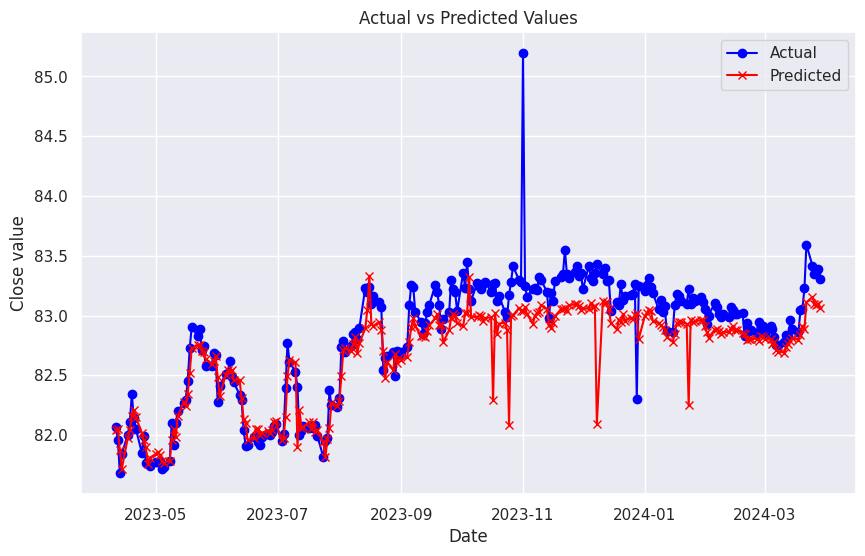

In [ ]:
ypred = model.predict(X_test)

predictions = pd.Series(ypred.squeeze(), index=Y_test.index)
combined = pd.concat([Y_test, predictions], axis=1)
combined.columns = ['Actual', 'Predicted']
print(combined)
plt.figure(figsize=(10, 6))
plt.plot(Y_test.index, Y_test.values, label='Actual', marker='o',color='blue')
plt.plot(predictions.index, predictions.values, label='Predicted', marker='x',color='red')
plt.xlabel('Date')
plt.ylabel('Close value')
plt.title('Actual vs Predicted Values')
plt.legend()
plt.show()


**********************************************

In [ ]:
#eur to inr
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv("eur_inr.csv",index_col="Date")
data=data.iloc[:,:-2].copy()
data.index = pd.to_datetime(data.index)
#print(data.head())
data['Close']=data.shift(-1)['Close']
data=data.iloc[:-1,:].copy()
#print(data.dtypes)
d= data.loc[:"2024-04-05"]
#print(d)
X_train=d.iloc[:,:-1].copy()
Y_train=d.iloc[:,-1].copy()
dt = data.loc["2024-01-08":]
#print(dt)
X_test=dt.iloc[:,:-1].copy()
Y_test=dt.iloc[:,-1].copy()
#Y_train


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import layers
model = Sequential([
    layers.Input((3, 1)),
                    layers.LSTM(64),
                    layers.Dense(32, activation='relu'),
                    layers.Dense(32, activation='relu'),
                    layers.Dense(32, activation='relu'),
                    layers.Dense(32, activation='relu'),
                    layers.Dense(32, activation='relu'),
    layers.Dense(1)
])

model.compile(loss='mse',
              optimizer=Adam(learning_rate=0.001),
              metrics=['mean_absolute_error'])

model.fit(X_train, Y_train, epochs=200, batch_size=32)

Epoch 1/200
9/9 [==============================] - 3s 5ms/step - loss: 8009.2329 - mean_absolute_error: 89.4878
Epoch 2/200
9/9 [==============================] - 0s 5ms/step - loss: 7925.7124 - mean_absolute_error: 89.0198
Epoch 3/200
9/9 [==============================] - 0s 5ms/step - loss: 7753.4629 - mean_absolute_error: 88.0465
Epoch 4/200
9/9 [==============================] - 0s 5ms/step - loss: 7397.3066 - mean_absolute_error: 85.9976
Epoch 5/200
9/9 [==============================] - 0s 5ms/step - loss: 6677.8735 - mean_absolute_error: 81.6949
Epoch 6/200
9/9 [==============================] - 0s 5ms/step - loss: 5247.1128 - mean_absolute_error: 72.3445
Epoch 7/200
9/9 [==============================] - 0s 6ms/step - loss: 2675.3069 - mean_absolute_error: 51.0644
Epoch 8/200
9/9 [==============================] - 0s 5ms/step - loss: 256.4436 - mean_absolute_error: 13.8447
Epoch 9/200
9/9 [==============================] - 0s 5ms/step - loss: 235.2556 - mean_absolute_error: 14

2/2 [==============================] - 0s 6ms/step
               Actual  Predicted
Date                            
2024-01-08  90.858002  89.248718
2024-01-09  90.803001  89.445129
2024-01-10  91.041000  89.454514
2024-01-11  91.143997  89.480774
2024-01-12  90.663002  89.459404
2024-01-15  90.648003  89.229759
2024-01-16  90.313004  89.328247
2024-01-17  90.442001  89.293388
2024-01-18  90.386002  89.307686
2024-01-19  89.437202  89.322632
2024-01-22  90.306000  89.139023
2024-01-23  90.282997  89.250572
2024-01-24  90.346001  89.321175
2024-01-25  90.099998  89.242760
2024-01-26  90.124001  89.215927
2024-01-29  90.025002  89.071861
2024-01-30  90.049004  89.192169
2024-01-31  89.617996  89.173286
2024-02-01  90.084000  89.087616
2024-02-02  89.218201  89.119431
2024-02-05  89.121002  88.954132
2024-02-06  89.261002  88.932732
2024-02-07  89.401001  88.985802
2024-02-08  89.278000  88.969231
2024-02-09  89.444000  89.020424
2024-02-12  89.309998  88.814713
2024-02-13  88.862000  88

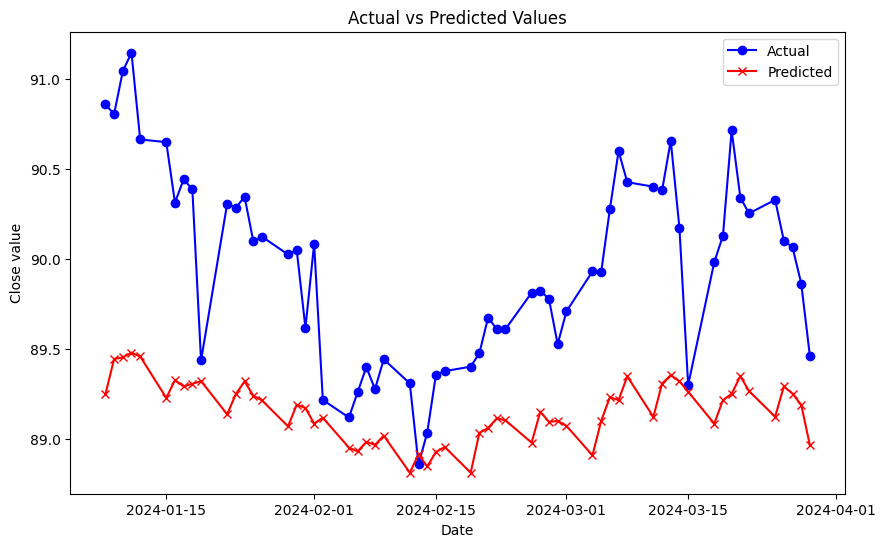

In [ ]:
ypred = model.predict(X_test)

predictions = pd.Series(ypred.squeeze(), index=Y_test.index)
combined = pd.concat([Y_test, predictions], axis=1)
combined.columns = ['Actual', 'Predicted']
print(combined)
plt.figure(figsize=(10, 6))
plt.plot(Y_test.index, Y_test.values, label='Actual', marker='o',color='blue')
plt.plot(predictions.index, predictions.values, label='Predicted', marker='x',color='red')
plt.xlabel('Date')
plt.ylabel('Close value')
plt.title('Actual vs Predicted Values')
plt.legend()
plt.show()

In [ ]:
#gbp to inr
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv("gbp_inr.csv",index_col="Date")
data=data.iloc[:,:-2].copy()
data.index = pd.to_datetime(data.index)
#print(data.head())
data['Close']=data.shift(-1)['Close']
data=data.iloc[:-1,:].copy()
#print(data.dtypes)
d= data.loc[:"2023-11-02"]
#print(d)
X_train=d.iloc[:,:-1].copy()
Y_train=d.iloc[:,-1].copy()
dt = data.loc["2023-11-03":]
print(dt)
X_test=dt.iloc[:,:-1].copy()
Y_test=dt.iloc[:,-1].copy()
#Y_train


                  Open        High         Low       Close
Date                                                      
2023-11-03  101.484787  102.890923  101.434219  102.925842
2023-11-06  102.857834  103.424072  102.611267  102.735954
2023-11-07  102.735634  102.736076  102.213493  102.308899
2023-11-08  102.303635  102.388840  101.956146  102.212631
2023-11-09  102.236160  102.503296  102.079117  101.794060
...                ...         ...         ...         ...
2024-03-25  105.382378  105.523346  105.118607  105.408020
2024-03-26  105.413017  105.519218  105.166534  105.233406
2024-03-27  105.248833  105.321762  105.048157  105.172188
2024-03-28  105.191185  105.480736  104.973251  105.283379
2024-03-29  105.283379  105.361725  105.114388  105.161301

[106 rows x 4 columns]


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import layers
model = Sequential([
    layers.Input((3, 1)),
                    layers.LSTM(64),
                    layers.Dense(32, activation='relu'),
                    layers.Dense(32, activation='relu'),
                    layers.Dense(32, activation='relu'),
                    layers.Dense(32, activation='relu'),
                    layers.Dense(32, activation='relu'),
    layers.Dense(1)
])

model.compile(loss='mse',
              optimizer=Adam(learning_rate=0.001),
              metrics=['mean_absolute_error'])

model.fit(X_train, Y_train, epochs=200, batch_size=32)

Epoch 1/200
13/13 [==============================] - 4s 5ms/step - loss: 9836.9189 - mean_absolute_error: 99.0931
Epoch 2/200
13/13 [==============================] - 0s 5ms/step - loss: 9703.5293 - mean_absolute_error: 98.4172
Epoch 3/200
13/13 [==============================] - 0s 5ms/step - loss: 9262.4092 - mean_absolute_error: 96.1408
Epoch 4/200
13/13 [==============================] - 0s 5ms/step - loss: 7835.3218 - mean_absolute_error: 88.3408
Epoch 5/200
13/13 [==============================] - 0s 6ms/step - loss: 4378.4321 - mean_absolute_error: 65.0915
Epoch 6/200
13/13 [==============================] - 0s 6ms/step - loss: 520.0271 - mean_absolute_error: 19.3330
Epoch 7/200
13/13 [==============================] - 0s 6ms/step - loss: 175.2941 - mean_absolute_error: 10.7769
Epoch 8/200
13/13 [==============================] - 0s 6ms/step - loss: 59.6023 - mean_absolute_error: 6.6279
Epoch 9/200
13/13 [==============================] - 0s 5ms/step - loss: 24.5061 - mean_absol

4/4 [==============================] - 0s 3ms/step
                Actual   Predicted
Date                              
2023-11-03  102.925842  101.898949
2023-11-06  102.735954  102.850441
2023-11-07  102.308899  102.375244
2023-11-08  102.212631  102.093323
2023-11-09  101.794060  102.209366
...                ...         ...
2024-03-25  105.408020  105.127808
2024-03-26  105.233406  105.157494
2024-03-27  105.172188  105.022713
2024-03-28  105.283379  105.020760
2024-03-29  105.161301  105.077072

[106 rows x 2 columns]


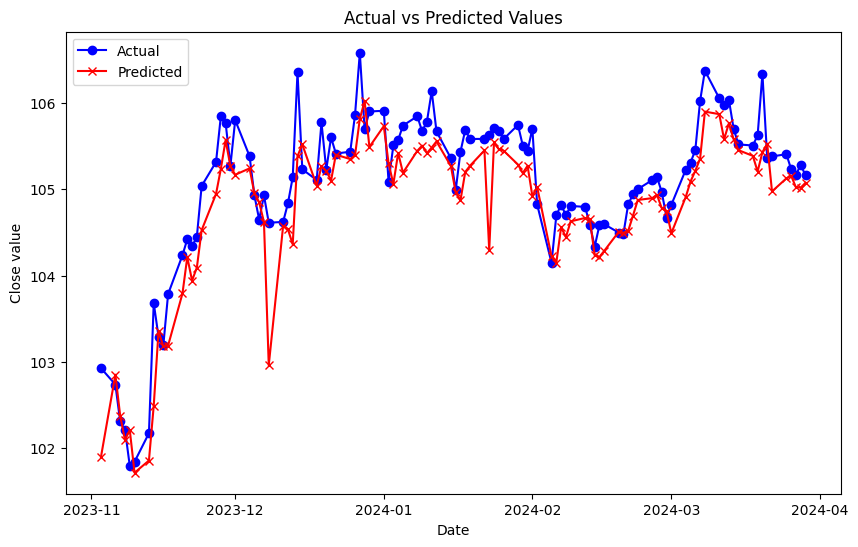

In [ ]:
ypred = model.predict(X_test)

predictions = pd.Series(ypred.squeeze(), index=Y_test.index)
combined = pd.concat([Y_test, predictions], axis=1)
combined.columns = ['Actual', 'Predicted']
print(combined)
plt.figure(figsize=(10, 6))
plt.plot(Y_test.index, Y_test.values, label='Actual', marker='o',color='blue')
plt.plot(predictions.index, predictions.values, label='Predicted', marker='x',color='red')
plt.xlabel('Date')
plt.ylabel('Close value')
plt.title('Actual vs Predicted Values')
plt.legend()
plt.show()